# <font color=red>**Charts**</font>

* https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html
* https://matplotlib.org/contents.html
* https://github.com/matplotlib/mplfinance

### Install pandas_datareader

* https://pydata.github.io/pandas-datareader/


In [1]:
!pip install pandas_datareader
!pip install seaborn
!pip install mplfinance

In [5]:
import pandas_datareader as pdr

# data_source: yahoo, quandl (https://www.quandl.com/)
stock = pdr.DataReader('0700.hk', start='2000', data_source='yahoo')
stock
# stock['Volume']


Date
2004-06-16    2.198875e+09
2004-06-17    4.190075e+08
2004-06-18    1.829900e+08
2004-06-21    1.140850e+08
2004-06-23    2.750800e+08
                  ...     
2020-09-23    1.251768e+07
2020-09-24    1.434697e+07
2020-09-25    1.322713e+07
2020-09-28    1.093996e+07
2020-09-29    1.143132e+07
Name: Volume, Length: 4016, dtype: float64

<AxesSubplot:xlabel='Date'>

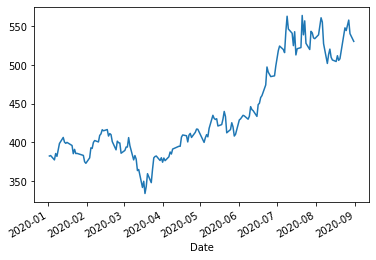

In [14]:
# stock.index
# stock.Close.index

# by label based indexer (loc)
# stock.loc['2020'] # dataframe
# stock.loc['2020-1':'2020-8'] # dataframe
# stock['2020']

# stock.Close['2020-1':'2020-8'] # summer
# stock.Close['2020-1':'2020-8'].plot()

##### Resample based on a frequency (something like groupby a frequency)
* Frequency: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases

##### plot doc
+ https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.plot.html

<AxesSubplot:xlabel='Date'>

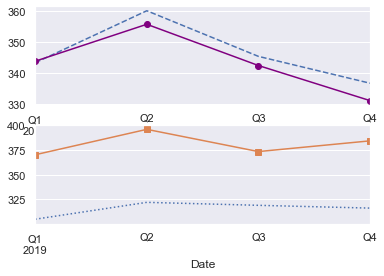

In [35]:
# stock.Close.resample('W') # DatetimeIndexResampler -> do aggregate function

# stock.Close.resample('W').mean() # resample every
# stock.Close['2020-1'].resample('B').max() # B: business day (mon - friday), max price of each business day
# stock.Close['2020'].resample('W').mean() # W: week, average price of each week
# stock.Close['2020'].resample('Q').mean() # Q: quarter end, average price of each quarter
# stock.Close['2020'].resample('M').mean() # M: month end
# stock.Close.resample('BA').mean().head() # BA: business year end, average price of each year

import matplotlib.pyplot as plt
import seaborn; seaborn.set()

fig, ax = plt.subplots(2) # row, col

stock.Close['2019'].resample('Q').mean().plot(ax=ax[0], style='--')
stock.Close['2019'].resample('Q').median().plot(ax=ax[0], color='purple', marker='o') # purple color

stock.Close['2019'].resample('Q').min().plot(ax=ax[1], style=':')
stock.Close['2019'].resample('Q').max().plot(ax=ax[1], style='s-')


##### Change Frequency (變更頻率):  asfreq()
+ https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.asfreq.html

##### plot doc
+ https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.plot.html

<AxesSubplot:title={'center':'Change frequency plot'}, xlabel='Date'>

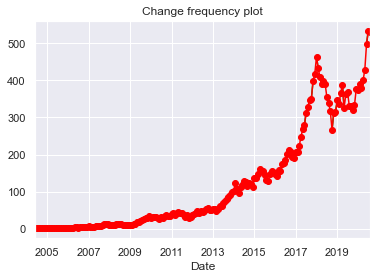

In [43]:
# stock.asfreq('Q') # change frequency to quarter
# stock.asfreq('M') # change frequency to month, return a dataframe

stock.asfreq('M', ).Close.plot(color='green', title='Change frequency plot')
stock.asfreq('M', method='ffill').Close.plot(color='blue', title='Change frequency plot', alpha=0.2)
# stock.asfreq('M', method='bfill').Close.plot(color='red', marker="o", title='Change frequency plot')


##### Shift data: shift() 
##### Shift index: tshift()

<AxesSubplot:xlabel='Date'>

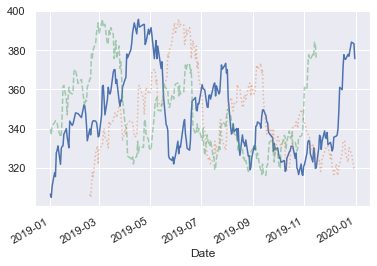

In [55]:
# stock.loc['2019'].Close.shift(3) # shift forward, fill NaN
# stock.loc['2019'].Close.shift(2, fill_value='0') # shift forward, fill with a value

stock.loc['2019'].Close.plot() # normal
stock.loc['2019'].Close.shift(30).plot(style=':', alpha=0.5) # shift forward
stock.loc['2019'].Close.shift(-30).plot(style='--', alpha=0.5) # shift backward



##### Moving Average

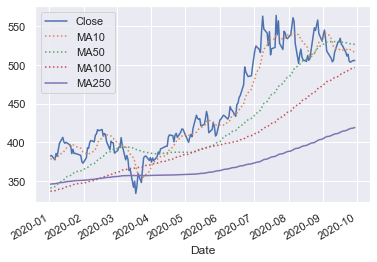

In [64]:
# stock['MA100'] = stock.Close.rolling(window=100).mean()
stock['MA10'] = stock.Close.rolling(window=10).mean()
stock['MA50'] = stock.Close.rolling(window=50).mean()
stock['MA100'] = stock.Close.rolling(window=100).mean()
stock['MA250'] = stock.Close.rolling(window=250).mean()

stock['2020'].Close.plot()
stock['2020'].MA10.plot(style=':')
stock['2020'].MA50.plot(style=':')
stock['2020'].MA100.plot(style=':')
stock['2020'].MA250.plot()

plt.legend(['Close', 'MA10', 'MA50', 'MA100', 'MA250'])


##### Bollinger Band
* https://www.fidelity.com/learning-center/trading-investing/technical-analysis/technical-indicator-guide/bollinger-bands

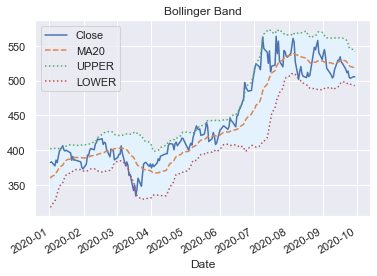

In [67]:
def bband(price, maSize, numStd):

    mean = price.rolling(window=maSize).mean()
    std = price.rolling(window=maSize).std()
    upper = mean + (std * numStd)
    lower = mean - (std * numStd)

    return mean, upper, lower


stock['MA20'], stock['UPPER'], stock['LOWER'] = bband(stock.Close, 20, 2)

stock.loc['2020':, ['Close', 'MA20','UPPER', 'LOWER']].plot(style=['-','--', ':', ':'], title='Bollinger Band')

plt.fill_between(stock.loc['2020':].index, stock.loc['2020':].UPPER, stock.loc['2020':].LOWER, color='#E3F2FD')

##### Candlestick chart 
+ https://github.com/matplotlib/mplfinance

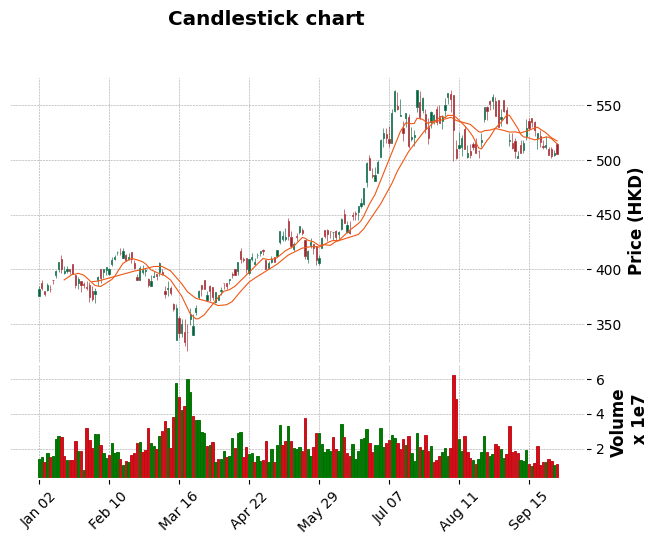

In [69]:
import mplfinance as mpf

mpf.plot(stock['2020'], type='candle', style='charles', title='Candlestick chart',
            ylabel='Price (HKD)',
            ylabel_lower='Volume',
            volume=True, 
            mav=(10,20))
